## Profundizando el Análisis: Patrones de Consumo en Centros Comerciales

El análisis previo nos proporcionó una visión clara de los **patrones de consumo**, identificando al **Efectivo (Cash)** como el método de pago dominante y al **segmento de clientes jóvenes (25-35 años)** como un motor clave de las ventas. 

Ahora, profundizaremos en estos hallazgos para entender el contexto en el que ocurren estas transacciones: **los centros comerciales**.  
El comportamiento del consumidor en un shopping está influenciado por factores como la **demografía del visitante**, la **hora del día** y la **dinámica propia de cada ubicación**.

Esta sección profundiza el análisis a través de **visualizaciones avanzadas** para responder a preguntas más complejas:

- ¿Cuál es el perfil demográfico de nuestros compradores de shopping?  
- ¿Existe una relación entre la edad y el poder de compra dentro de este entorno?  
- ¿Nuestras ventas siguen patrones estacionales o dependen de eventos específicos del calendario comercial?

Para ello, utilizaremos un conjunto de **herramientas gráficas clave**:

1. **Gráfico de barras:** para comparar magnitudes entre categorías como las preferencias de pago y los ingresos por producto.  
2. **Histograma:** para visualizar la distribución de nuestros clientes.  
3. **Gráfico de torta** Para una rapida visualizacion**

Estos gráficos nos permitirán pasar de los **datos agregados** a un **entendimiento más profundo** de las tendencias que definen el éxito en el competitivo entorno de los centros comerciales.

# Fase 1: Proceso ETL - Preparación y Limpieza de Datos

El objetivo de esta primera fase es aplicar un proceso completo de Extracción, Transformación y Carga (ETL) para convertir los datos crudos en un conjunto de información limpio, consistente y listo para el análisis. A continuación, se detallan los pasos realizados:

## 1. Extracción (Extract)
Se cargaron los dos archivos CSV (`customer_data.csv` y `sales_data.csv`) en dos DataFrames de Pandas independientes: `df_clientes` y `df_ventas`.

## 2. Transformación (Transform)
Esta es la etapa central del proceso, donde se realizaron las siguientes operaciones clave:

### Unión de Datos
Se combinaron los DataFrames `df_ventas` y `df_clientes` en un único DataFrame (`df_final`) utilizando la columna `customer_id` como clave. Se aplicó una unión interna (*inner join*) para asegurar la integridad de los datos, garantizando que cada venta correspondiera a un cliente con información completa.

### Limpieza y Estandarización

- **Manejo de Valores Nulos**: Se identificaron 119 valores nulos en la columna `age`, los cuales fueron imputados utilizando la mediana para no perder registros de ventas y evitar sesgos en los datos.

- **Conversión de Tipos de Datos**: Se estandarizaron las columnas más importantes para el análisis. La columna `invoice_date` se convirtió a formato `datetime` para permitir operaciones temporales, y las columnas `age` y `price` se convirtieron a `int` para asegurar la correcta ejecución de cálculos.

- **Verificación de Duplicados**: Se confirmó que el conjunto de datos no contenía filas duplicadas, asegurando la fiabilidad del análisis.

## Resultado
Al finalizar esta fase, obtuvimos el DataFrame `df_final`, un conjunto de datos robusto y limpio, preparado para la fase de análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Carga de los datasets, Para  leer los datasets usamos los metodos que vienen con la libreria pandas "pd.read_csv()"
df_clientes = pd.read_csv('customer_data.csv')
df_ventas = pd.read_csv('sales_data.csv')

In [3]:
df_clientes.head() #Muestra las primeras 5 filas para entender las columnas


,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [4]:
df_clientes.info()  # Nos da un resumen de las columnas, la cantidad de datos no nulos y sus tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [5]:
df_ventas.head() # Muestra las primeras 5 filas para entender las columnas

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon


In [6]:
df_ventas.info() # Nos da un resumen de las columnas, la cantidad de datos no nulos y sus tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


In [7]:
df_final = pd.merge(df_ventas, df_clientes, on='customer_id') # Usamos el metodo pd.merge() para fusionar ambos dataframes a traves del customer_id
df_final.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,Male,20.0,Cash
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM,Female,66.0,Credit Card
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,Female,53.0,Cash


In [8]:
df_final.isnull().sum() # Sumamos los datos nulos

invoice_no          0
customer_id         0
category            0
quantity            0
price               0
invoice_date        0
shopping_mall       0
gender              0
age               119
payment_method      0
dtype: int64

In [9]:
#Como tenemos 119 valores nulos usamos el metodo fillna() para rellenar, vamos a rellenar con la media de las edades:
# Calculamos la media de la columna 'age' media = promedio de edad
media_edad = df_final['age'].mean()

# Rellenamos los valores nulos con la media
df_final['age'] = df_final['age'].fillna(media_edad)
df_final.isnull().sum() 

invoice_no        0
customer_id       0
category          0
quantity          0
price             0
invoice_date      0
shopping_mall     0
gender            0
age               0
payment_method    0
dtype: int64

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   invoice_date    99457 non-null  object 
 6   shopping_mall   99457 non-null  object 
 7   gender          99457 non-null  object 
 8   age             99457 non-null  float64
 9   payment_method  99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


In [11]:
#Estandarizacion de los tipos de datos de flotante a entero
df_final["price"] = df_final["price"].astype(int) # Correccion de tipo de dato, pasamos a enteros (int)
df_final["age"] = df_final["age"].astype(int)
df_final

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500,05-08-2022,Kanyon,Female,28,Credit Card
1,I317333,C111565,Shoes,3,1800,12-12-2021,Forum Istanbul,Male,21,Debit Card
2,I127801,C266599,Clothing,1,300,09-11-2021,Metrocity,Male,20,Cash
3,I173702,C988172,Shoes,5,3000,16-05-2021,Metropol AVM,Female,66,Credit Card
4,I337046,C189076,Books,4,60,24-10-2021,Kanyon,Female,53,Cash
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Souvenir,5,58,21-09-2022,Kanyon,Female,45,Credit Card
99453,I325143,C569580,Food & Beverage,2,10,22-09-2021,Forum Istanbul,Male,27,Cash
99454,I824010,C103292,Food & Beverage,2,10,28-03-2021,Metrocity,Male,63,Debit Card
99455,I702964,C800631,Technology,4,4200,16-03-2021,Istinye Park,Male,56,Cash


In [12]:
df_final.duplicated().sum() #verificamos si hay datos duplicados, en el caso de haber datos duplicados los sumamos

np.int64(0)

In [13]:
df_final['invoice_date'] = pd.to_datetime(df_final['invoice_date'], format='%d-%m-%Y') # Cambiamos el formato de la fecha de object a date time
df_final.info() #un paso indispensable para el análisis, con object no podemos hacer filtrados y operaciones cronologicas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   category        99457 non-null  object        
 3   quantity        99457 non-null  int64         
 4   price           99457 non-null  int64         
 5   invoice_date    99457 non-null  datetime64[ns]
 6   shopping_mall   99457 non-null  object        
 7   gender          99457 non-null  object        
 8   age             99457 non-null  int64         
 9   payment_method  99457 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 7.6+ MB


# Fase 2: Análisis Exploratorio de Datos (EDA)

Con el DataFrame `df_final` ya limpio y preparado, esta segunda fase se centra en realizar un análisis exploratorio para extraer los *insights* de negocio solicitados. El objetivo es traducir los datos en respuestas concretas a las preguntas clave sobre el comportamiento de los clientes.

A continuación, se presentan los cálculos realizados con Pandas para responder a cada una de las siguientes preguntas:

## Análisis Realizados

### 1. Modo de pago más frecuente
- **Análisis general**: Se utilizó el método `.mode()` para identificar el método de pago predominante en todo el dataset.
- **Segmentación por género**: Se aplicó un `.groupby()` para segmentar este análisis por género.

### 2. Métodos de pago para el rango etario de 25 a 35 años
- Se filtró el DataFrame para aislar este segmento demográfico.
- Se utilizó `.value_counts()` para contar la frecuencia de uso de cada método de pago.

### 3. Métodos de pago más utilizados por las mujeres
- Se aplicó un filtro por género.
- Se utilizó `.value_counts()` para obtener el detalle de las preferencias del público femenino.

### 4. Análisis de precios por categoría
- Se utilizó `.groupby('category')` junto con la función `.agg()`.
- Se calcularon simultáneamente el precio **mínimo**, **máximo** y **promedio** de los productos en cada categoría.

## Resultados
Los resultados de estos análisis se presentan en las siguientes celdas de código y son la base para las visualizaciones y conclusiones finales del informe.

1) Perfil demográfico de los compradores (Histograma de edades)

Objetivo: visualizar la distribución de edad de los visitantes/compradores en los centros comerciales.

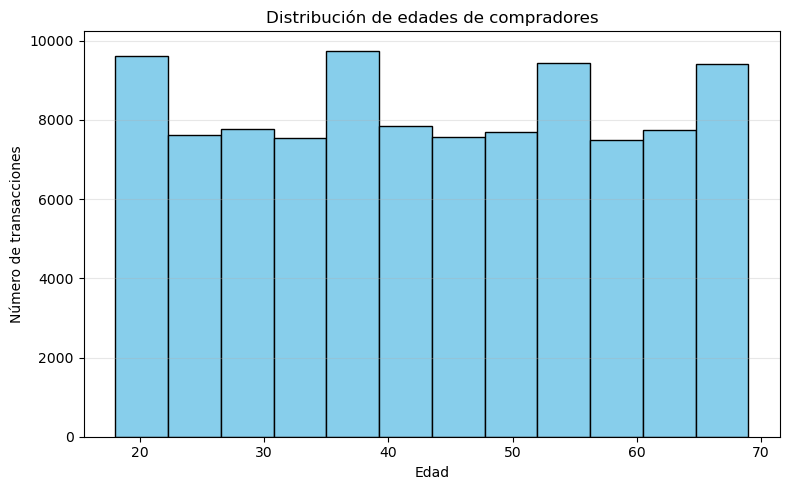

In [14]:
plt.figure(figsize=(8, 5))

# Añadimos los parámetros 'color' y 'edgecolor'
plt.hist(df_final['age'].dropna(), 
         bins=12, 
         color='skyblue',        # Color de relleno de las barras
         edgecolor='black')      # Color del borde de las barras

plt.title('Distribución de edades de compradores')
plt.xlabel('Edad')
plt.ylabel('Número de transacciones')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('fig_histograma_edades_color.png', dpi=300, bbox_inches='tight')
plt.show()

**Tipo de gráfico:** Histograma.

**Interpretación:**

La distribución de edades de los compradores es relativamente uniforme, sin una franja etaria claramente predominante. Esto indica que el shopping atrae a un público diverso en edades, desde adultos jóvenes hasta personas mayores. En consecuencia, las estrategias comerciales deberían mantenerse amplias e inclusivas, con acciones diferenciadas por segmento (por ejemplo, promociones familiares o descuentos para adultos mayores, además de propuestas para jóvenes).

## Modo de pago más frecuente General


In [15]:
# Respondemos a las preguntas de Modo de pago más frecuente (general)
# gaurdamos en la variable pago_mas_frecuente_general el calculo de la media con el metodo .mode() y [0] para obtener el primer elemento de la serie
pago_mas_frecuente_general = df_final['payment_method'].mode()[0]
print(f"Pago más frecuente general: {pago_mas_frecuente_general}")


Pago más frecuente general: Cash


**Gráfico de Torta: Distribución General de Métodos de Pago**

**Tipo de gráfico:** Gráfico de Torta (o Circular).

**Justificación:** Se eligió este tipo de gráfico porque es ideal para mostrar la proporción de cada categoría sobre un total. En este caso, visualiza de forma clara y directa qué porcentaje del total de las transacciones corresponde a cada método de pago.

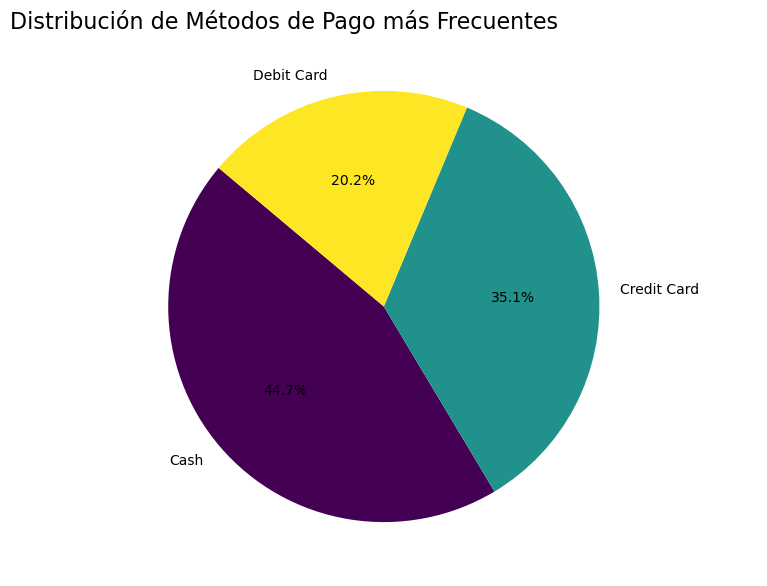

In [17]:
# Gráfico de Torta: Distribución General de Métodos de Pago
plt.figure(figsize=(10, 7))
payment_counts = df_final['payment_method'].value_counts()

# --- Alternativa automática ---
# 1. Obtenemos un mapa de colores (ej. 'viridis', 'plasma', 'coolwarm')
cmap = plt.get_cmap('viridis') 
# 2. Generamos un número de colores igual al número de categorías
colores_automaticos = cmap(np.linspace(0, 1, len(payment_counts)))

plt.pie(payment_counts, 
        labels=payment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colores_automaticos) # Usamos los colores generados

plt.title( 'Distribución de Métodos de Pago más Frecuentes                            ', fontsize=16)
plt.ylabel('')
plt.show()

**Interpretación:**

El análisis revela una fuerte dependencia de las transacciones en **Efectivo (Cash)**, que representa casi la mitad de todas las compras (44.7%). La **Tarjeta de Crédito** es el segundo método más popular, constituyendo un significativo 35.2% del total.

Esto indica que, si bien el efectivo es el rey, existe una base de clientes muy amplia y receptiva a las opciones de pago digital y financiación. La **Tarjeta de Débito** se posiciona como una opción minoritaria pero relevante.

## Pago más frecuente por Genero

In [18]:
# Agrupamos por genero el metodo de pago, agg(pd.Series.mode) es una funcion de agregacion, para aplicar el calculo de la moda a cada sub-grupo 
pago_mas_frecuente_genero = df_final.groupby('gender')['payment_method'].agg(pd.Series.mode) #agg = Resume cada grupo usando la función de la moda.
#Llama a la función de agregación (agg), y pásale como argumento la función pd.Series.mode para que esta sea la que se aplique sobre cada grupo."
pago_mas_frecuente_genero 

gender
Female    Cash
Male      Cash
Name: payment_method, dtype: object

**Gráfico de Barras: Uso de Métodos de Pago por Género**

**Tipo de gráfico:** Gráfico de Barras Agrupadas.

**Justificación:** Este gráfico es la mejor herramienta para comparar directamente el comportamiento de dos grupos diferentes (hombres y mujeres) a través de varias categorías (los métodos de pago). Permite una comparación visual instantánea.

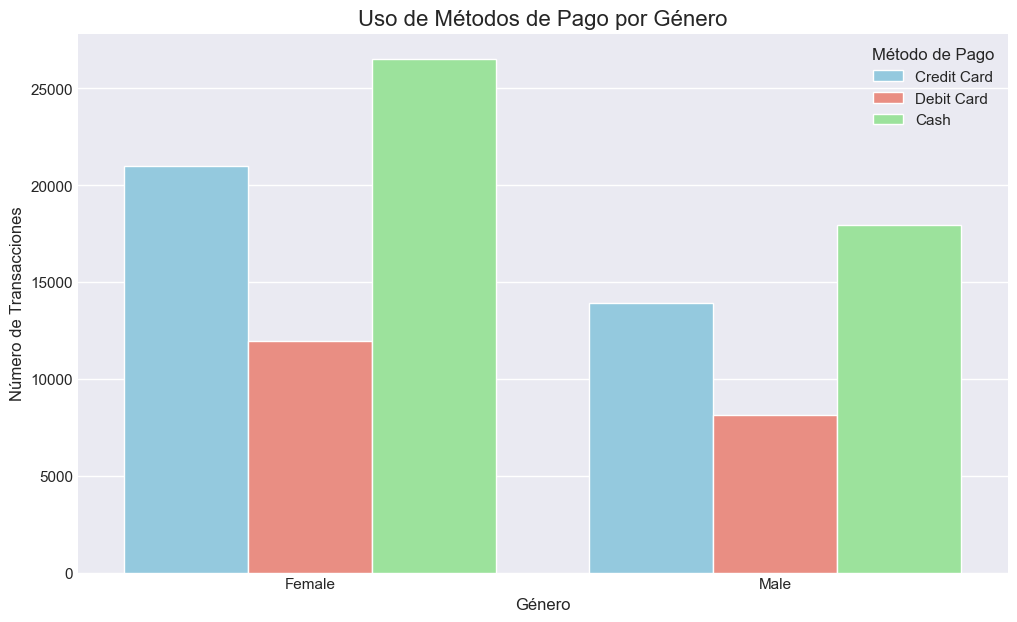

In [37]:
# Gráfico de Barras: Uso de Métodos de Pago por Género
colores_principales = ['skyblue', 'salmon', 'lightgreen']
plt.figure(figsize=(12, 7))

sns.countplot(
    data=df_final, 
    x='gender', 
    hue='payment_method', 
    palette = {
    "Credit Card": "skyblue",
    "Debit Card":  "salmon",
    "Cash":        "lightgreen"
}
)

plt.title('Uso de Métodos de Pago por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.legend(title='Método de Pago')

plt.show()

**Interpretación:**

Al segmentar por género, observamos que la preferencia por el **Efectivo (Cash)** se mantiene como la opción principal tanto para hombres como para mujeres. Sin embargo, surge un *insight* clave: **las mujeres utilizan la Tarjeta de Crédito con una frecuencia notablemente mayor que los hombres**.

Esto sugiere que las campañas de marketing que ofrezcan beneficios con tarjetas de crédito, como cuotas sin interés o descuentos, podrían tener un impacto especialmente fuerte en el público femenino.

## Metodos de pago para el rango etario de 25 a 35 años


In [20]:
# 1) Aplicamos la condicion a todas las filas donde la edad sea  >= 25 y <= 35, nos da como resuiltado otro DataFrame con los valores filtrados
# 2) Nos devuelve una lista de los métodos de pago y su frecuencia de uso para ese rango de edad, tomando los datos de la columna payment_method del DF filtrado
df_rango_edad = df_final[(df_final['age'] >= 25) & (df_final['age'] <= 35)] # 1)
pagos_rango_edad = df_rango_edad['payment_method'].value_counts() # 2) 
print("Pagos en el rango de 25-35 años:")
print(pagos_rango_edad)


Pagos en el rango de 25-35 años:
payment_method
Cash           9356
Credit Card    7274
Debit Card     4263
Name: count, dtype: int64


**Gráfico de Barras: Preferencia de Pago en el Segmento Joven (25-35 años)**

**Tipo de gráfico:** Gráfico de Barras Horizontales.

**Justificación:** Este tipo de gráfico es muy efectivo para mostrar un ranking o una clasificación de preferencias de forma clara y ordenada, facilitando la lectura de los resultados para un segmento específico.

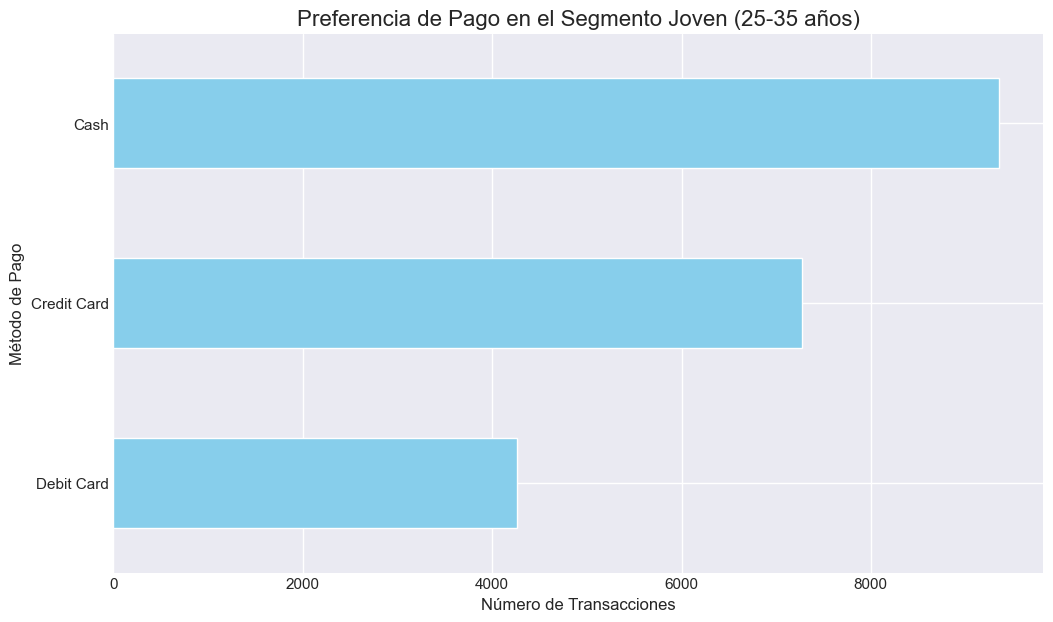

In [36]:
# Gráfico de Barras: Preferencia de Pago en el Segmento Joven (25-35 años)
plt.figure(figsize=(12, 7))
pagos_rango_edad = df_final[(df_final['age'] >= 25) & (df_final['age'] <= 35)]['payment_method'].value_counts()
pagos_rango_edad.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Preferencia de Pago en el Segmento Joven (25-35 años)', fontsize=16)
plt.xlabel('Número de Transacciones', fontsize=12)
plt.ylabel('Método de Pago', fontsize=12)
plt.show()

**Interpretación:**

El segmento de clientes jóvenes, que representa un motor clave de nuestro negocio, muestra una clara preferencia por el **Efectivo (Cash)**, superando significativamente a las otras opciones.

Este comportamiento puede indicar una preferencia por la simplicidad y el control del gasto. Para capturar y fidelizar a este valioso segmento, las estrategias deben enfocarse en la **conveniencia**, ya sea optimizando las transacciones en efectivo o introduciendo opciones de pago digital que sean percibidas como igualmente rápidas y sencillas.

## Análisis de Comportamiento de Compra por Género

In [22]:
# Agrupamos los datos para contar las transacciones por categoría y genero
gender_category_analysis = df_final.groupby(['category', 'gender'])['invoice_no'].count().reset_index()

# Renombramos la columna para mayor claridad
gender_category_analysis.rename(columns={'invoice_no': 'transaction_count'}, inplace=True)

print(gender_category_analysis.head())


    category  gender  transaction_count
0      Books  Female               2906
1      Books    Male               2075
2   Clothing  Female              20652
3   Clothing    Male              13835
4  Cosmetics  Female               9070


**Gráfico de Barras:** Volumen de Compras por Género y Categoría

**Tipo de gráfico:** Gráfico de Barras Agrupadas.

**Justificación:** Se eligió este tipo de gráfico porque es la herramienta visual más efectiva para comparar una cantidad (número de compras) entre dos grupos distintos (femenino y masculino) a través de múltiples categorías. La agrupación de las barras permite ver de un solo vistazo tanto las preferencias generales en una categoría como la diferencia de comportamiento entre ambos géneros dentro de la misma

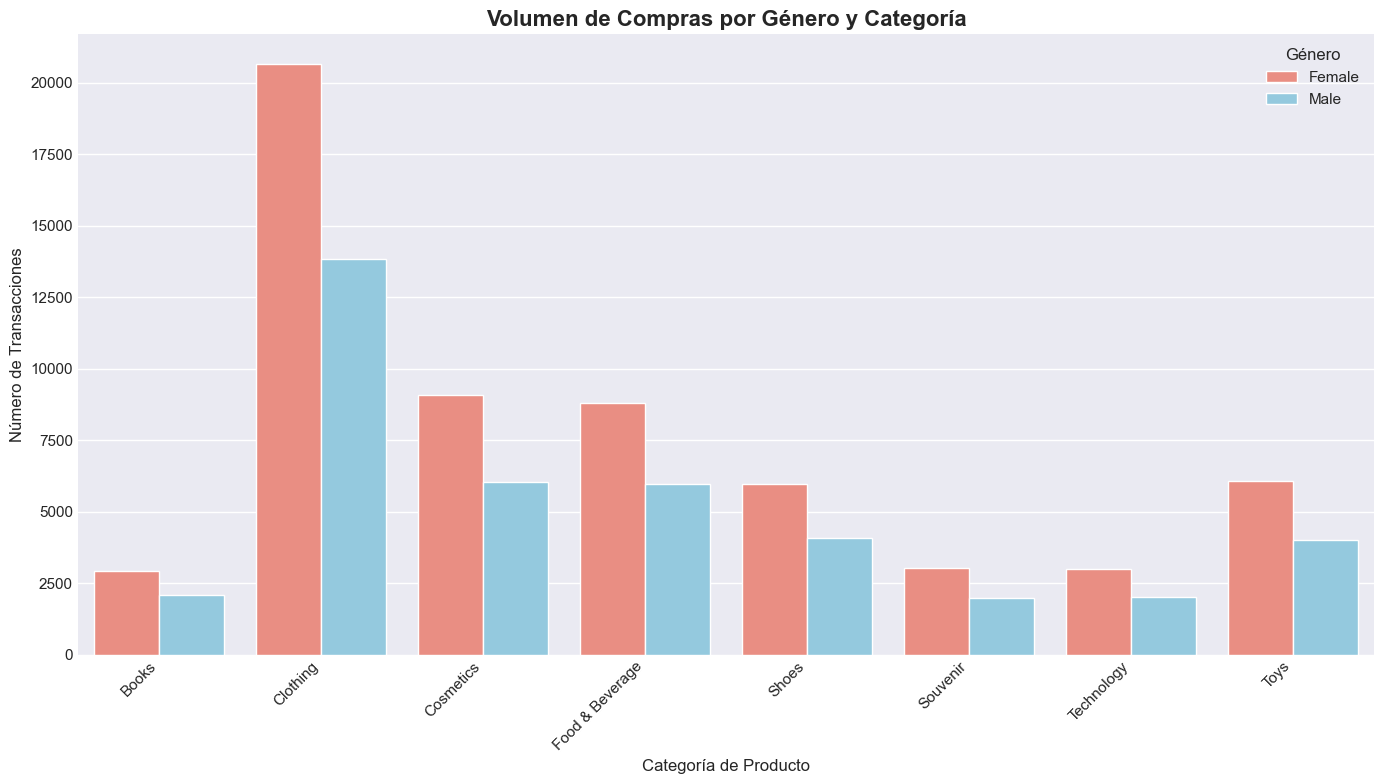

In [34]:
# --- ANÁLISIS: Contar compras por categoría y género ---
# Agrupamos los datos para contar el número de transacciones
# para cada combinación de 'category' y 'gender'.
gender_category_analysis = df_final.groupby(['category', 'gender'])['invoice_no'].count().reset_index()
gender_category_analysis.rename(columns={'invoice_no': 'transaction_count'}, inplace=True)

# --- VISUALIZACIÓN DEL GRÁFICO ---
plt.style.use('seaborn-v0_8-darkgrid') # Estilo visual atractivo
plt.figure(figsize=(14, 8)) # Tamaño de la figura para mejor legibilidad

# Creamos el gráfico de barras con Seaborn
# x='category': Las categorías en el eje horizontal
# y='transaction_count': La altura de las barras (número de compras)
# hue='gender': Agrupa las barras por género, asignando un color a cada uno
sns.barplot(
    data=gender_category_analysis,
    x='category',
    y='transaction_count',
    hue='gender',
    palette={'Male': 'skyblue', 'Female': 'salmon'} # Colores personalizados
)

# --- PERSONALIZACIÓN DEL GRÁFICO ---
plt.title('Volumen de Compras por Género y Categoría', fontsize=16, fontweight='bold')
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotamos las etiquetas para que no se superpongan
plt.legend(title='Género')
plt.tight_layout() # Ajusta el gráfico para que todo encaje bien

# Mostrar el gráfico
plt.show()


**Interpretación:**
El análisis visual confirma que el público femenino es el principal motor de compra en las categorías de mayor volumen, como *"Clothing" (Ropa)* y *"Cosmetics" (Cosméticos)*, donde su participación supera ampliamente a la del público masculino. En contraste, en categorías de alto valor como *"Technology" (Tecnología)*, el comportamiento de compra es más equilibrado.

Este hallazgo es clave: sugiere que las estrategias de marketing para los productos de alta rotación deben tener un enfoque y una comunicación dirigidos principalmente al segmento femenino.

## Metodos de pago más utilizados por mujeres

In [21]:
pagos_mujeres = df_final[df_final['gender'] == 'Female']['payment_method'].value_counts()
print("Pagos más usados por mujeres:")
print(pagos_mujeres)


Pagos más usados por mujeres:
payment_method
Cash           26509
Credit Card    21011
Debit Card     11962
Name: count, dtype: int64


**Gráfico de Barras: Comportamiento de Compra del Segmento Femenino**

**Tipo de gráfico:** Gráfico de Barras Horizontales.

**Justificación:** Al igual que en el caso anterior, este gráfico nos permite visualizar de forma ordenada las preferencias de un segmento demográfico crucial para el negocio.

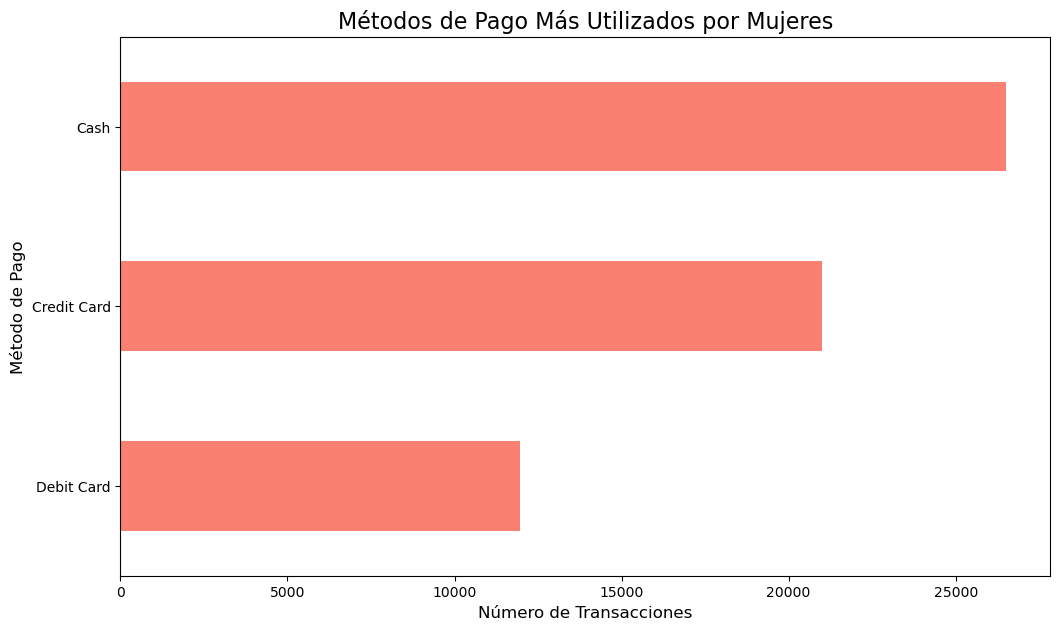

In [24]:
plt.figure(figsize=(12, 7))
pagos_mujeres = df_final[df_final['gender'] == 'Female']['payment_method'].value_counts()
pagos_mujeres.sort_values(ascending=True).plot(kind='barh', color='salmon')
plt.title('Métodos de Pago Más Utilizados por Mujeres', fontsize=16)
plt.xlabel('Número de Transacciones', fontsize=12)
plt.ylabel('Método de Pago', fontsize=12)
plt.show()


**Interpretación:**

El análisis del segmento femenino revela que el **Efectivo (Cash)** es el método de pago más utilizado, seguido de cerca por la **Tarjeta de Crédito**.

La proximidad entre estas dos opciones es estratégica: indica que, aunque el efectivo es una opción de conveniencia, una gran parte de este segmento está dispuesta a utilizar tarjetas, especialmente si se ofrecen los incentivos adecuados. Esto refuerza la oportunidad de enfocar campañas de financiación y beneficios con tarjetas de crédito directamente a este público.

## Precios por categoría de productos

In [23]:
# Agrupa el DataFrame por la columna 'category', seleccionar la columna 'price' 
# y calcular el precio mínimo, máximo y promedio para cada categoría
precios_por_categoria = df_final.groupby('category')['price'].agg(['min', 'max', 'mean'])
print("Precios por categoría:")
print(precios_por_categoria)


Precios por categoría:
                  min   max         mean
category                                
Books              15    75    45.117446
Clothing          300  1500   900.843796
Cosmetics          40   203   121.867325
Food & Beverage     5    26    15.185030
Shoes             600  3000  1806.876619
Souvenir           11    58    34.314663
Technology       1050  5250  3156.935548
Toys               35   179   107.214137


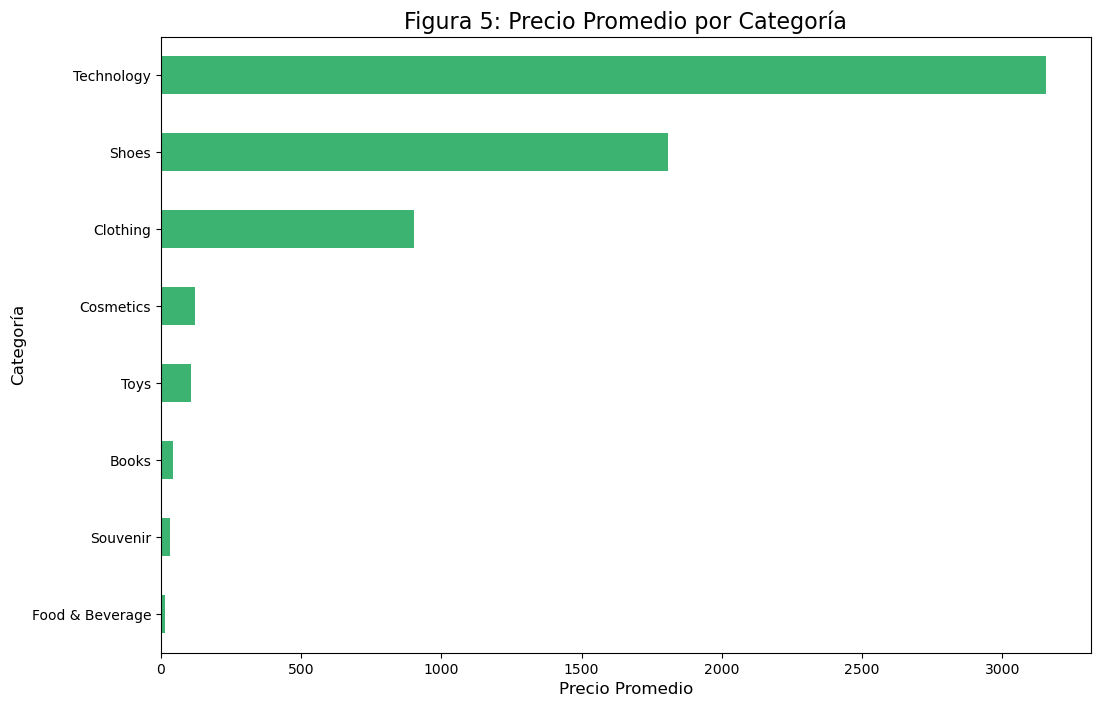

In [26]:
plt.figure(figsize=(12, 8))
precios_por_categoria = df_final.groupby('category')['price'].mean().sort_values(ascending=True)
precios_por_categoria.plot(kind='barh', color='mediumseagreen')
plt.title('Figura 5: Precio Promedio por Categoría', fontsize=16)
plt.xlabel('Precio Promedio', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.show()



**Gráfico de Barras: Análisis de Precios Promedio por Categoría**

**Tipo de gráfico:** Gráfico de Barras Horizontales.

**Justificación:** Este gráfico es ideal para comparar una métrica numérica (el precio promedio) a través de diferentes categorías, permitiendo identificar rápidamente cuáles son las de mayor y menor valor.

### Analisis Adicional: **Para precios por categoria**


**Distribución de Precios por Categoría (Boxplot)**

**Tipo de gráfico:** Gráfico de Cajas y Bigotes (Boxplot).

**Justificación:** Este tipo de gráfico es una herramienta poderosa para ir más allá de los promedios. Nos muestra la distribución y variabilidad completa de los precios dentro de cada categoría, permitiendo identificar no solo la mediana (el precio central), sino también el rango de precios del 50% de las ventas y la presencia de valores atípicos.

Orden de categorías para el gráfico: ['Technology', 'Shoes', 'Clothing', 'Cosmetics', 'Toys', 'Books', 'Souvenir', 'Food & Beverage']


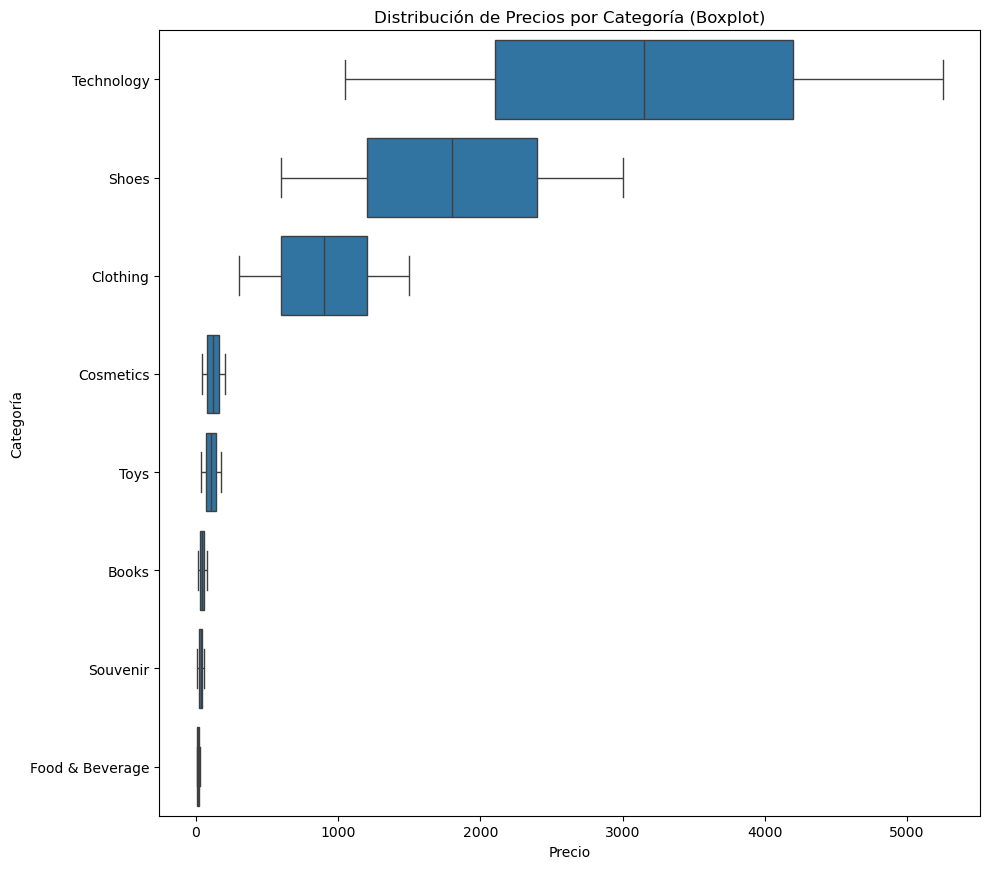

In [27]:
# ===== Gráfico 2: Boxplot horizontal por categoría (muestra la distribución) =====

# 1. Agrupamos por 'category' y calculamos el precio mediano para cada una.
#    Asumimos que tu DataFrame se llama df_final o df_plot.
#    Asegúrate de usar el nombre correcto de tu DataFrame.
df_plot = df_final # o como se llame tu dataframe con los datos

median_prices = df_plot.groupby('category')['price'].median()

# 2. Ordenamos las categorías de mayor a menor según su precio mediano.
cats_ordenadas = median_prices.sort_values(ascending=False)

# 3. Creamos la lista 'cats' con los nombres de las categorías ya en el orden correcto.
cats = cats_ordenadas.index.tolist()

# Ahora 'cats' es una lista como ['Technology', 'Shoes', 'Clothing', ...]
# y ya la puedes usar en tu código sin que te dé error.
print("Orden de categorías para el gráfico:", cats)




plt.figure(figsize=(10, 0.6 * len(cats) + 4))
sns.boxplot(
    x='price',
    y='category',
    data=df_plot,
    order=cats,      # Ahora 'cats' existe y tiene el orden deseado
    showfliers=True
)
plt.xlabel('Precio')
plt.ylabel('Categoría') # Es buena práctica nombrar también el eje Y
plt.title('Distribución de Precios por Categoría (Boxplot)')
plt.tight_layout()
plt.show()

*Interpretación para el cliente:*

Este análisis nos revela la "personalidad" de los precios en cada categoría. Observamos dos comportamientos muy distintos:

**Categorías Premium:** *Technology* y *Shoes* se destacan no solo por tener los precios más altos, sino también por la gran longitud de sus "cajas" y "bigotes". Esto indica una alta variabilidad de precios, lo que sugiere una estrategia de oferta diversificada que incluye desde productos de gama media hasta artículos de lujo.

**Categorías de Volumen:** Por el contrario, categorías como *Food & Beverage* y *Souvenir* presentan cajas muy compactas, lo que significa que sus precios son muy consistentes y se concentran en un rango bajo. Esto confirma su rol como productos de alta rotación y compra impulsiva.

Entender esta distribución es fundamental para la gestión de inventario y para diseñar promociones efectivas: las campañas en categorías premium pueden enfocarse en financiación, mientras que en las de volumen, en ofertas por cantidad.



**Histograma de Precios (apilado por categoría)**

**Tipo de gráfico:** Histograma apilado por categoría.

**Justificación:** Muestra la frecuencia de observaciones por rangos (bins) de precio y cómo cada categoría contribuye a esos rangos. Es útil para ver concentración de ventas por rango de precio y la forma general de la distribución.

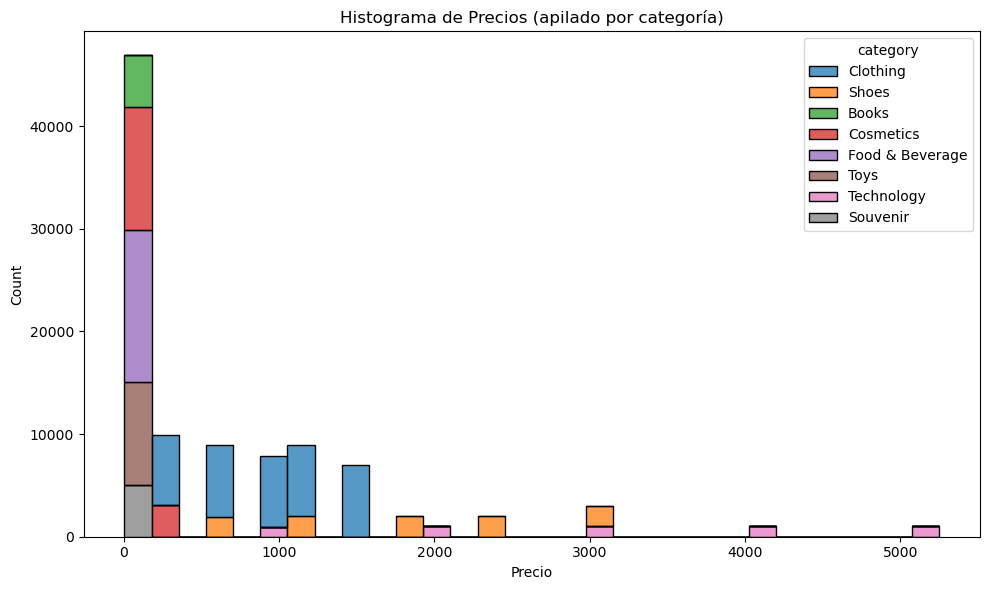

In [28]:

plt.figure(figsize=(10,6))
sns.histplot(data=df_plot, x='price', hue='category', multiple='stack', bins=30)
plt.title('Histograma de Precios (apilado por categoría)')
plt.xlabel('Precio')
plt.tight_layout()
plt.show()

**Interpretación para el cliente:**

La mayor parte de las transacciones se concentra en los rangos de precio bajos (la barra izquierda acumulada), lo que indica que el negocio mueve volumen principalmente en productos de bajo ticket.

- Las categorías de bajo precio (**Food & Beverage, Toys, Books, Cosmetics, Souvenir**) dominan los bins inferiores.

- **Clothing** aporta tanto a rangos bajos como medios, mientras que **Shoes** y especialmente **Technology** contribuyen más a los bins de precios medios y altos, formando la cola derecha de la distribución.

La distribución global es asimétrica a la derecha: muchos pedidos de bajo valor y una cola (menos frecuente) de pedidos de alto valor que elevan el ingreso promedio total.

## Lista de Resultados:

In [29]:
print("Pago más frecuente general:", pago_mas_frecuente_general)
print("\nPago más frecuente por género:\n", pago_mas_frecuente_genero)
print("\nPagos en el rango de 25-35 años:\n", pagos_rango_edad)
print("\nPagos más usados por mujeres:\n", pagos_mujeres)
print("\nPrecios por categoría:\n", precios_por_categoria)

Pago más frecuente general: Cash

Pago más frecuente por género:
 gender
Female    Cash
Male      Cash
Name: payment_method, dtype: object

Pagos en el rango de 25-35 años:
 payment_method
Cash           9356
Credit Card    7274
Debit Card     4263
Name: count, dtype: int64

Pagos más usados por mujeres:
 payment_method
Cash           26509
Credit Card    21011
Debit Card     11962
Name: count, dtype: int64

Precios por categoría:
 category
Food & Beverage      15.185030
Souvenir             34.314663
Books                45.117446
Toys                107.214137
Cosmetics           121.867325
Clothing            900.843796
Shoes              1806.876619
Technology         3156.935548
Name: price, dtype: float64


# Fase 3: Análisis Comparativo del Comportamiento del Consumidor por Centro Comercial

## Objetivo General
Profundizar en el análisis de datos para realizar un estudio comparativo detallado sobre el comportamiento de los clientes en los diferentes centros comerciales, contrastando la demografía y preferencias de compra entre ubicaciones.

## Ejes de Análisis

### 1. Distribución por Edades
- **Examen comparativo** de la distribución de edades de clientes por centro comercial
- **Identificación** de perfiles demográficos predominantes o distintivos
- **Análisis de segmentación** etaria específica por ubicación

### 2. Preferencias de Compra por Edad y Ubicación
- **Investigación** de categorías de productos más consumidas por grupos etarios
- **Identificación** de patrones de consumo específicos
- **Análisis comparativo** de cómo las preferencias varían por:
  - Grupo de edad
  - Centro comercial visitado

## Propósito Estratégico
- Obtener una comprensión granular de los perfiles de consumidores por ubicación
- Sentar bases para la formulación de:
  - Estrategias comerciales segmentadas
  - Estrategias de marketing más efectivas
  - Acciones personalizadas por centro comercial

## Análisis Comparativo de la Distribución por Edades por Centro Comercial


In [24]:
# Agrupa los datos por centro comercial, selecciona la columna 'age' y calcula un resumen
# de estadísticas como: la media, desviación estándar, mínimo, máximo
# para las edades en cada centro
print("Análisis Descriptivo de Edad por Centro Comercial:")
edad_analisis = df_final.groupby('shopping_mall')['age'].describe() 
print(edad_analisis)



Análisis Descriptivo de Edad por Centro Comercial:
                     count       mean        std   min   25%   50%   75%   max
shopping_mall                                                                 
Cevahir AVM         4991.0  43.173713  14.905570  18.0  30.0  43.0  56.0  69.0
Emaar Square Mall   4811.0  43.558512  14.880803  18.0  31.0  43.0  57.0  69.0
Forum Istanbul      4947.0  43.525369  15.171466  18.0  30.0  44.0  57.0  69.0
Istinye Park        9781.0  43.384010  15.035138  18.0  30.0  43.0  56.0  69.0
Kanyon             19823.0  43.498714  14.946462  18.0  31.0  43.0  56.0  69.0
Mall of Istanbul   19943.0  43.441007  15.026467  18.0  30.0  43.0  56.0  69.0
Metrocity          15011.0  43.496303  14.954888  18.0  30.0  43.0  56.0  69.0
Metropol AVM       10161.0  43.214251  14.970452  18.0  30.0  43.0  56.0  69.0
Viaport Outlet      4914.0  43.298942  14.985724  18.0  30.0  43.0  56.0  69.0
Zorlu Center        5075.0  43.515862  14.901764  18.0  31.0  44.0  56.0  69.0


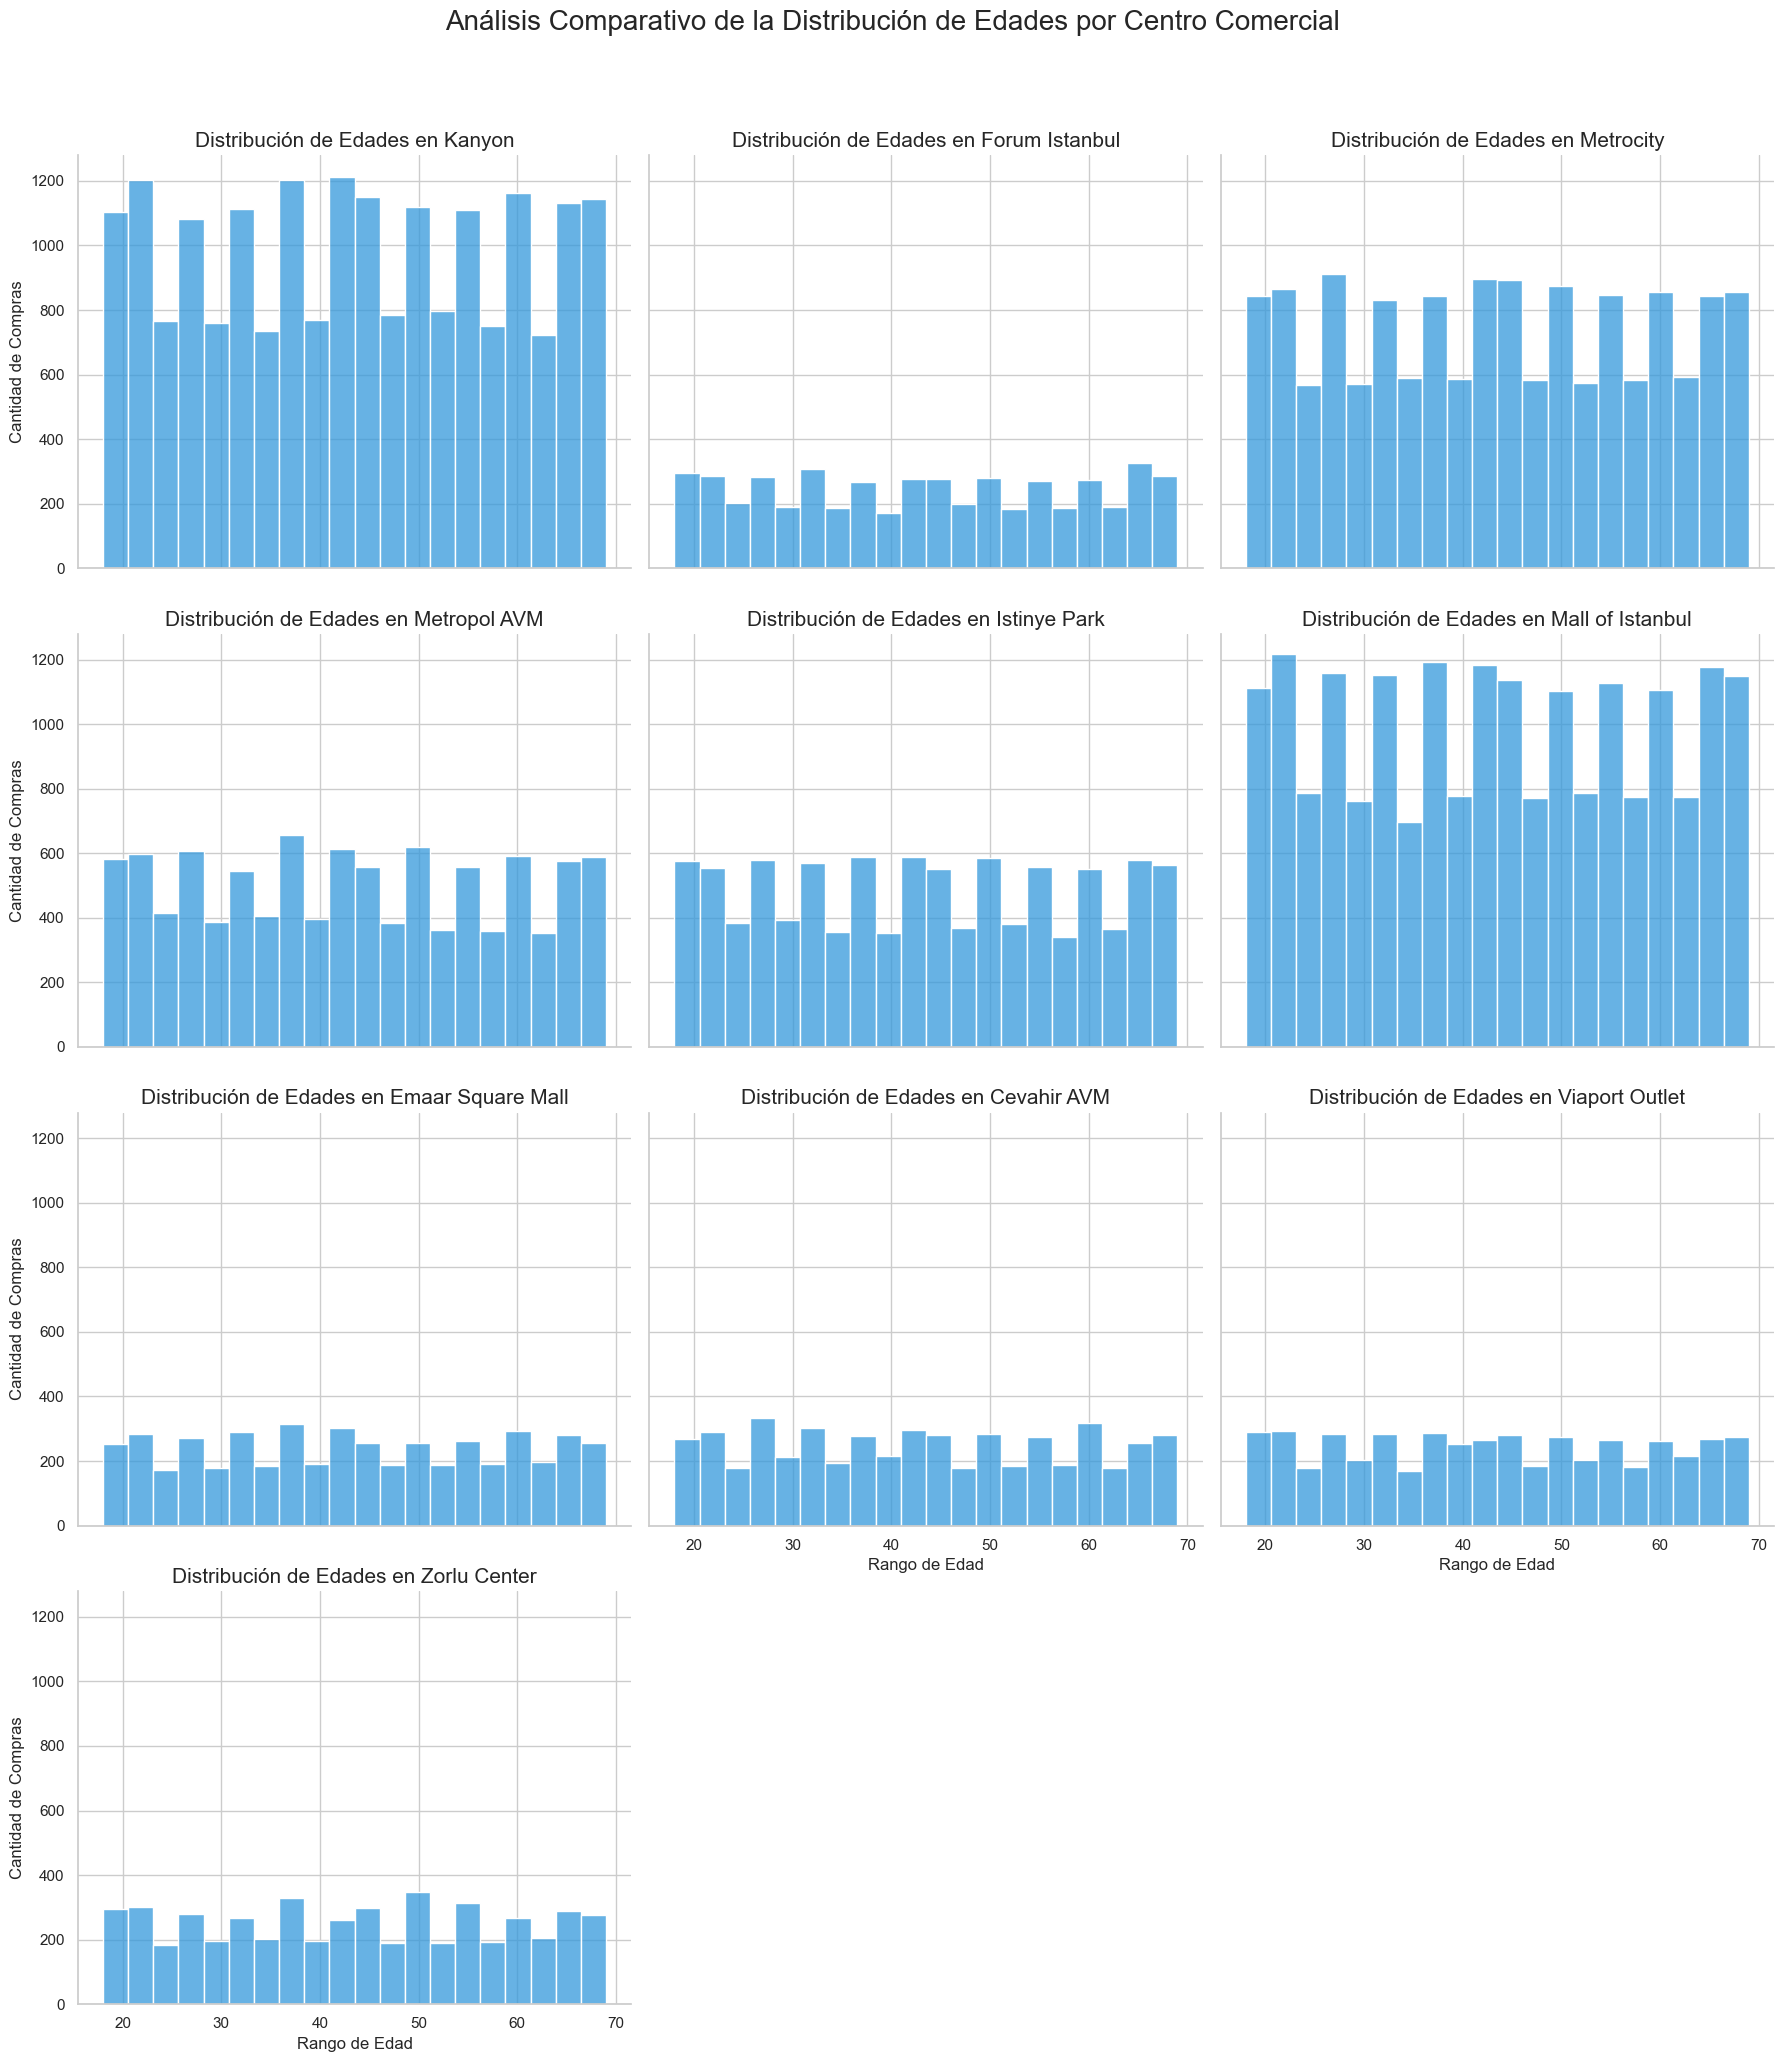

In [31]:
# Generación de gráficos
# Usaremos un FacetGrid de Seaborn para crear un histograma para cada centro comercial.
# Esto es muy eficaz para comparar distribuciones.
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)
g = sns.FacetGrid(df_final, col="shopping_mall", col_wrap=3, height=5, aspect=1.2)
g.map(sns.histplot, 'age', bins=20, kde=False, color='#3498db')

# 4. Personalización de los gráficos
g.set_titles("Distribución de Edades en {col_name}", size=15)
g.set_axis_labels("Rango de Edad", "Cantidad de Compras", size=12)
g.fig.suptitle('Análisis Comparativo de la Distribución de Edades por Centro Comercial', size=20, y=1.03)

# Ajustar el espaciado para que los títulos no se superpongan
plt.tight_layout()

# Guardar el gráfico en un archivo
plt.savefig('distribucion_edades_por_mall.png', dpi=300)

# Mostrar el gráfico
plt.show()

**Tipo de Gráfico:** Histograma

**Justificación de la Elección**

- **Herramienta visual ideal** para variables numéricas continuas como la edad
- **Visualización clara** de la frecuencia de clientes por rangos de edad
- **Presentación en grilla** que facilita la comparación directa entre centros comerciales

## Interpretación de Resultados

### Hallazgos Principales
- **Distribución uniforme** en la mayoría de centros comerciales
- **Ausencia de concentración predominante** en un único grupo etario
- **Diferencias sutiles** que sugieren mayor atractivo para segmentos específicos



## Análisis de Categorías de Compra por Grupo de Edad
### Identificación de las Dos Categorías Más Compradas por Grupo de Edad en Cada Mall

In [32]:
# Crear grupos de edad
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-24', '25-34', '35-44', '45-59', '60+']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False)

#  las dos categorías más compradas por los grupos de edad en cada mall
popular_category_per_mall = df_final.groupby(
    ['shopping_mall', 'age_group', 'category'], observed=True #observed=True = categorias que han sido observadas!
).size().reset_index(name='count')

top2_simple = (
    popular_category_per_mall
    .sort_values(['shopping_mall', 'age_group', 'count', 'category'],
                 ascending=[True, True, False, True])
    .groupby(['shopping_mall', 'age_group'], observed=True)
    .head(2)
    .reset_index(drop=True)
)

print("\n--- Top 2 simple (máximo 2 filas por grupo) ---")
print(top2_simple)



--- Top 2 simple (máximo 2 filas por grupo) ---
   shopping_mall age_group         category  count
0    Cevahir AVM     18-24         Clothing    228
1    Cevahir AVM     18-24        Cosmetics    103
2    Cevahir AVM     25-34         Clothing    341
3    Cevahir AVM     25-34  Food & Beverage    153
4    Cevahir AVM     35-44         Clothing    351
..           ...       ...              ...    ...
95  Zorlu Center     35-44  Food & Beverage    160
96  Zorlu Center     45-59         Clothing    521
97  Zorlu Center     45-59        Cosmetics    247
98  Zorlu Center       60+         Clothing    338
99  Zorlu Center       60+        Cosmetics    147

[100 rows x 4 columns]


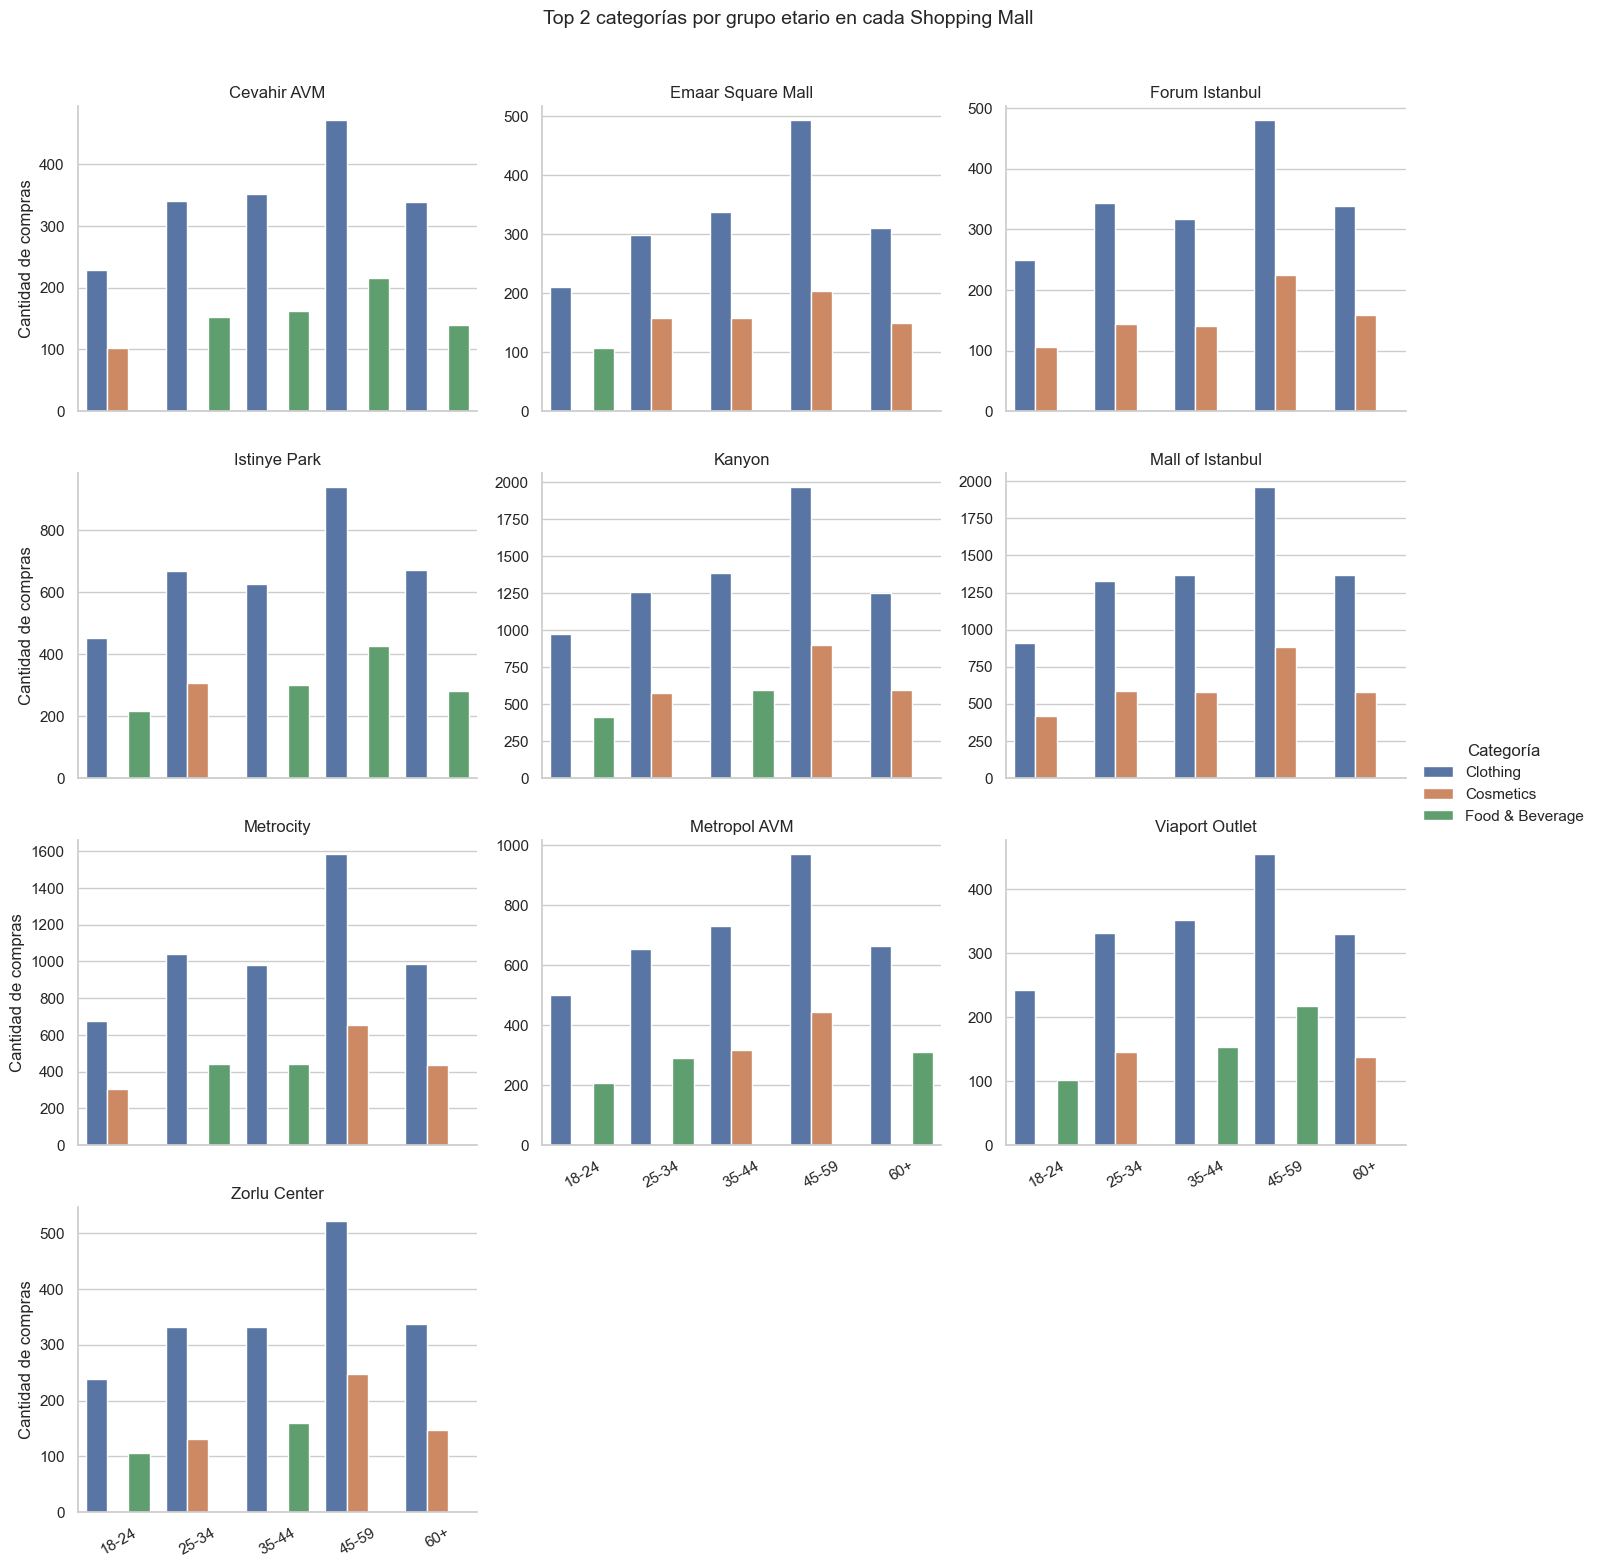

In [33]:
# Asegurate de que age_group sea string (evita problemas con categorías)
top2_simple = top2_simple.copy()
top2_simple['age_group'] = top2_simple['age_group'].astype(str)

# Ajustar age_order para que contenga solo las etiquetas disponibles (mantiene orden lógico si coinciden)
age_order = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']  # cambiá si querés otros bins
available_ages = [a for a in age_order if a in top2_simple['age_group'].unique()]

# Si available_ages queda vacío, usar el orden natural de los datos
if not available_ages:
    available_ages = sorted(top2_simple['age_group'].unique(), key=str)

# Asegurarse que count sea numérico (evitar proporciones inesperadas)
top2_simple['count'] = pd.to_numeric(top2_simple['count'], errors='coerce').fillna(0)

# Si querés mostrar comparables entre malls, pon sharey=True; si no, False
sns.set_style("whitegrid")
g = sns.catplot(
    data=top2_simple,
    kind='bar',
    x='age_group', y='count',
    hue='category',
    col='shopping_mall',
    col_wrap=3,
    height=4, aspect=1.2,
    order=available_ages,
    sharey=False
)

g.set_axis_labels("", "Cantidad de compras")
g.set_titles("{col_name}")
g._legend.set_title("Categoría")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Top 2 categorías por grupo etario en cada Shopping Mall", fontsize=14)

# mejorar legibilidad de ejes x
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=30)


plt.show()

### Tipo de gráfico: Gráfico de Barras Agrupadas.

**Justificación:** Se optó por un gráfico de barras agrupadas para comparar las cantidades de compra de las dos categorías de productos más populares dentro de cada grupo de edad. Este formato permite una comparación visual directa y efectiva, no solo entre las dos categorías principales para un mismo grupo etario, sino también entre los diferentes grupos de edad dentro del mismo centro comercial. La agrupación de barras facilita la identificación de patrones y tendencias de consumo específicas.

**Interpretación:** El análisis comparativo de las categorías más compradas demuestra que "Ropa" (Clothing) y "Cosméticos" (Cosmetics) son las preferidas de manera consistente en la mayoría de los grupos de edad y centros comerciales. No obstante, el gráfico permite identificar excepciones y nichos de mercado. Por ejemplo, en algunos malls, categorías como "Tecnología" (Technology) o "Calzado" (Shoes) ganan relevancia en segmentos de edad específicos. Estos hallazgos son cruciales para optimizar el inventario, planificar la disposición de las tiendas y diseñar promociones dirigidas que resuenen con las preferencias de cada perfil demográfico en cada ubicación.

## EXPORTACIÓN PARA BASE DE DATOS 
**Guardamos el DataFrame limpio en un nuevo archivo CSV**

In [52]:
df_final.to_csv('datos_limpios.csv', index=False) # index false es importante ya que nos permite no exportar el indice
print("DataFrame exportado exitosamente a 'datos_limpios.csv'")

DataFrame exportado exitosamente a 'datos_limpios.csv'


In [53]:
# LINEA NUEVA Y CLAVE PARA MySQL pasamos a formato universal de año / mes / dia  

df_final['invoice_date'] = df_final['invoice_date'].dt.strftime('%Y-%m-%d')
df_final.to_csv('datos_limpios_import.csv', index=False)

print("DataFrame exportado con fechas en formato YYYY-MM-DD.")

DataFrame exportado con fechas en formato YYYY-MM-DD.
